# Project 1 Group 7 Initial Exploratory Analysis

## Title: Japan Birth Demographics

## 
Team Members: Ashley Anderson, Christine Jauregui, Melissa Krachmer, Greg Schreiter

Could eliminate some unused columns of japan_pds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#Path to csv file
path='Resources/japan_birth.csv'
japan_pd=pd.read_csv(path)

#Save column names
cols=japan_pd.columns
print(cols)

Index(['Unnamed: 0', 'year', 'birth_total', 'birth_male', 'birth_female',
       'birth_rate', 'birth_gender_ratio', 'total_fertility_rate',
       'population_total', 'population_male', 'population_female',
       'infant_death_total', 'infant_death_male', 'infant_death_female',
       'infant_death_unknown_gender', 'infant_death_rate',
       'infant_death_gender_ratio', 'infant_deaths_in_total_deaths',
       'stillbirth_total', 'stillbirth_male', 'stillbirth_female',
       'stillbirth_unknown_gender', 'stillbirth_rate',
       'stillbirth_gender_ratio', 'firstborn', 'secondborn', 'thirdborn',
       'forthborn', 'fifthborn_and_above', 'weeks_under_28', 'weeks_28-31',
       'weeks_32-36', 'weeks_37-41', 'weeks_over_42', 'mother_age_avg',
       'mother_age_firstborn', 'mother_age_secondborn', 'mother_age_thirdborn',
       'mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29',
       'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44',
       'mother_age_over_45', '


### Total Fertility Rate over the last 100 years


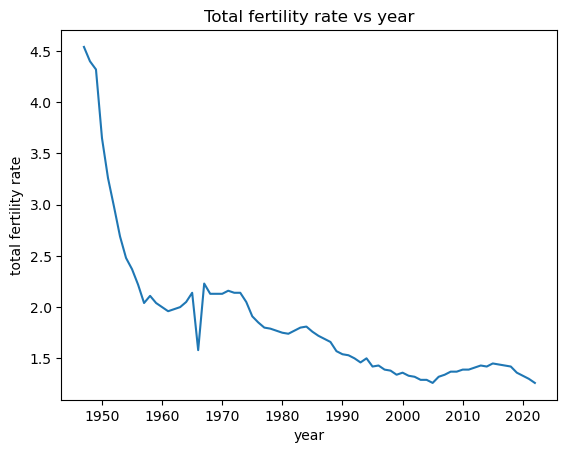

In [2]:
plt.plot(japan_pd['year'], japan_pd['total_fertility_rate'])
plt.xlabel("year")
plt.ylabel("total fertility rate")
plt.title("Total fertility rate vs year")
plt.show()

In the above, our data is missing until 1947. Thus, we can't quite look back 100 years for this.

### How were fertility rate, # of still births, etc. impacted by major events (e.g. war)?

In [20]:
print(japan_pd[['year', 'birth_total','stillbirth_total', 'stillbirth_rate']])


     year  birth_total  stillbirth_total  stillbirth_rate
0    1899    1386981.0          135727.0             89.1
1    1900    1420534.0          137987.0             88.5
2    1901    1501591.0          155489.0             93.8
3    1902    1510835.0          157708.0             94.5
4    1903    1489816.0          153920.0             93.6
..    ...          ...               ...              ...
119  2018     918400.0           19614.0             20.9
120  2019     865239.0           19454.0             22.0
121  2020     840835.0           17278.0             20.1
122  2021     811622.0           16277.0             19.7
123  2022     770759.0           15179.0             19.3

[124 rows x 4 columns]


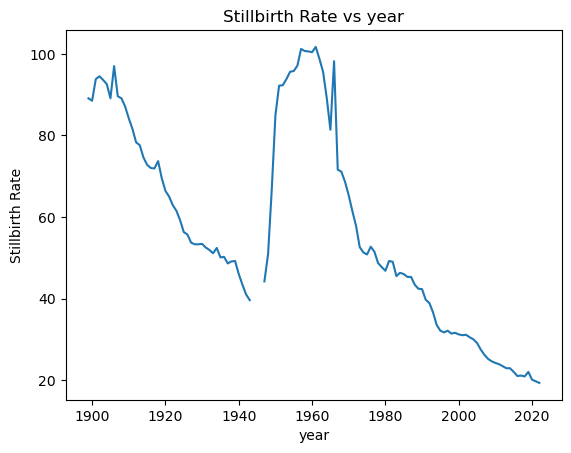

In [3]:
plt.plot(japan_pd['year'], japan_pd['stillbirth_rate'])
plt.xlabel("year")
plt.ylabel("Stillbirth Rate")
plt.title("Stillbirth Rate vs year")
plt.show()

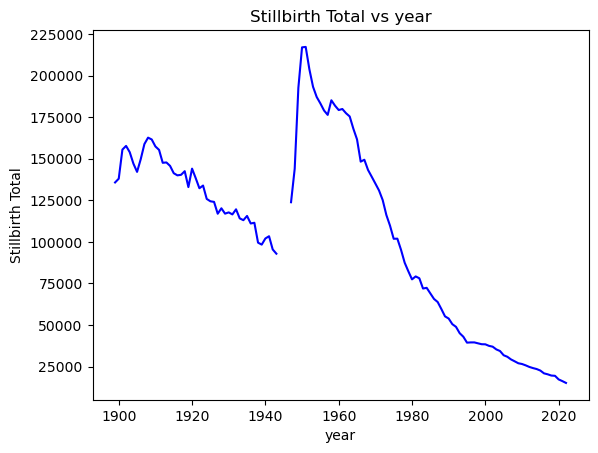

In [26]:
plt.plot(japan_pd['year'], japan_pd['stillbirth_total'], color='blue')
plt.xlabel("year")
plt.ylabel("Stillbirth Total")
plt.title("Stillbirth Total vs year")
plt.show()

In [ ]:
#

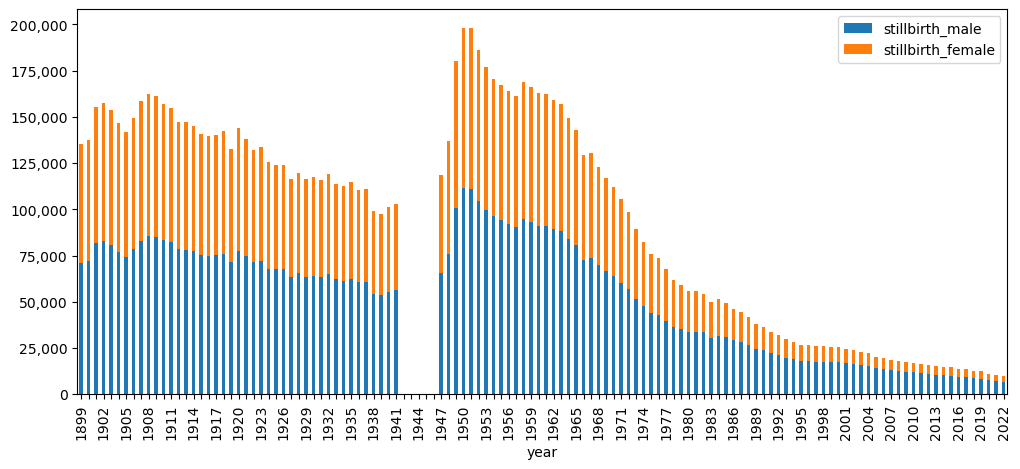

In [5]:
#stillbirth difference between male and female
ax = japan_pd.plot.bar(x="year", y=["stillbirth_male", "stillbirth_female"], figsize=(12,5), stacked=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(ticks=range(len(japan_pd["year"])), labels=[v if i%3 == 0 else '' for i, v in enumerate(japan_pd["year"])])
plt.show()


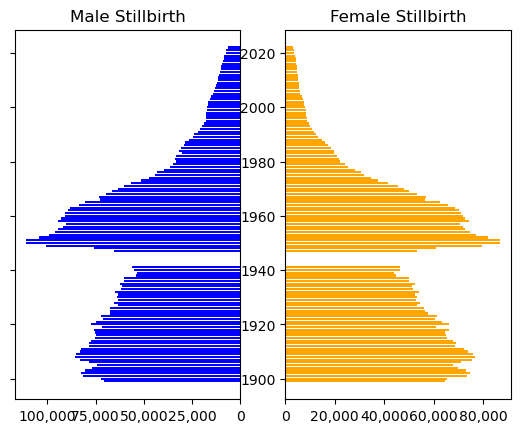

In [27]:
#stillbirth difference between male and female another way
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.barh(japan_pd["year"], japan_pd["stillbirth_male"], align='center', color='blue')
ax2.barh(japan_pd["year"], japan_pd["stillbirth_female"], align='center', color="orange")
ax1.invert_xaxis()
ax1.set_title("Male Stillbirth")
ax2.set_title("Female Stillbirth")
ax1.yaxis.set_ticklabels([])
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

### How has the # of children born out of wedlock changed over the last 50 years?


In [6]:
#What years contain data for illegitimate_child?
japan_df=pd.DataFrame()
japan_df=pd.DataFrame(japan_pd)
japan_df

result = japan_df[japan_df['illegitimate_child'].notnull()]
print(result)

     Unnamed: 0  year  birth_total  birth_male  birth_female  birth_rate  \
48           48  1947    2678792.0   1376986.0     1301806.0        34.3   
51           51  1950    2337507.0   1203111.0     1134396.0        28.1   
56           56  1955    1730692.0    889670.0      841022.0        19.4   
61           61  1960    1606041.0    824761.0      781280.0        17.2   
66           66  1965    1823697.0    935366.0      888331.0        18.6   
71           71  1970    1934239.0   1000403.0      933836.0        18.8   
76           76  1975    1901440.0    979091.0      922349.0        17.1   
81           81  1980    1576889.0    811418.0      765471.0        13.6   
86           86  1985    1431577.0    735284.0      696293.0        11.9   
91           91  1990    1221585.0    626971.0      594614.0        10.0   
96           96  1995    1187064.0    608547.0      578517.0         9.6   
101         101  2000    1190547.0    612148.0      578399.0         9.5   
102         

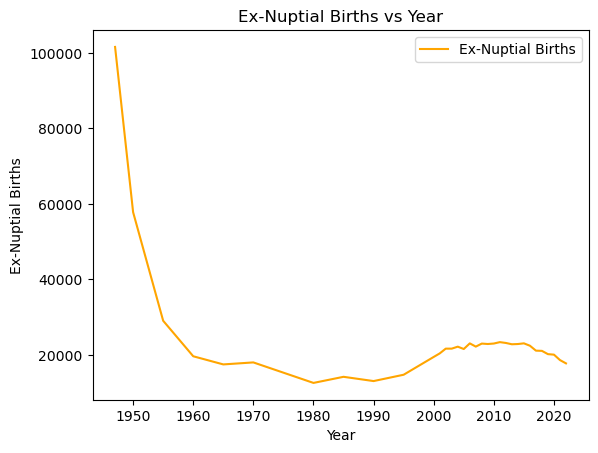

In [14]:
# illegitimate_child: number of birth per year

plt.plot(result['year'], result['illegitimate_child'], color='orange', label="Ex-Nuptial Births")
plt.xlabel("Year")
plt.ylabel("Ex-Nuptial Births")
plt.title("Ex-Nuptial Births vs Year")
plt.legend()
plt.show()


In [8]:
#result is dataframe for years we have out-of-wedlock births reported
#calcuate out-of-wedlock births/total births and birth rate by year to see if rate of out-of-of 
#wedlock births stayed consistent with overall birth rate 

# Select specific columns using indexing operator
selected_columns = result[['year', 'birth_total','birth_rate', 'total_fertility_rate','population_total','legitimate_child','illegitimate_child']]

# Print the new DataFrame
#print(selected_columns)

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
selected_columns_copy = selected_columns.copy()

#add a new column for % of children born ex-nuptial
selected_columns_copy['ex_nuptial %'] = 100*(selected_columns_copy['illegitimate_child']/selected_columns_copy['birth_total'])

# Print the updated DataFrame
selected_columns_copy

,year,birth_total,birth_rate,total_fertility_rate,population_total,legitimate_child,illegitimate_child,ex_nuptial %
48,1947,2678792.0,34.3,4.54,78101473,2577212.0,101580.0,3.792008
51,1950,2337507.0,28.1,3.65,83199637,2279718.0,57789.0,2.472249
56,1955,1730692.0,19.4,2.37,89275529,1701674.0,29018.0,1.676670
61,1960,1606041.0,17.2,2.00,93418501,1586429.0,19612.0,1.221139
66,1965,1823697.0,18.6,2.14,98274961,1806245.0,17452.0,0.956957
71,1970,1934239.0,18.8,2.13,103119447,1916257.0,17982.0,0.929668
76,1975,1901440.0,17.1,1.91,111251507,1886174.0,15266.0,0.802865
81,1980,1576889.0,13.6,1.75,116320358,1564341.0,12548.0,0.795744
86,1985,1431577.0,11.9,1.76,120265700,1417409.0,14168.0,0.989678
91,1990,1221585.0,10.0,1.54,122721397,1208546.0,13039.0,1.067384


Between 1947 and 2000, births out of wedlock are reported only every five years. Starting in 2000, these numbers are reported every year. 

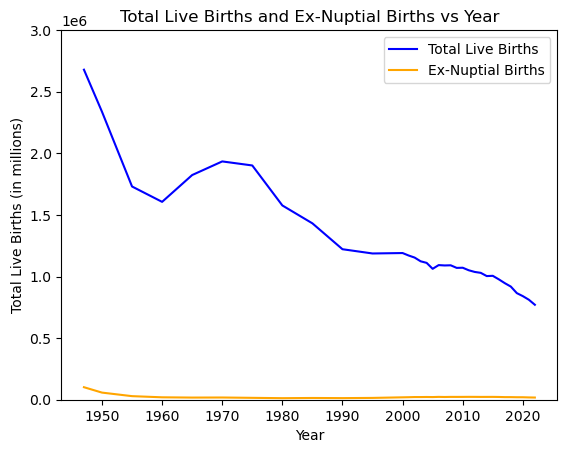

In [10]:
#Plot ex_nuptial births and total live births by year
 
#x=selected_columns_copy['year']
#y1=selected_columns_copy['birth_total']
#y2=selected_columns_copy['ex_nuptial']

fig, ax = plt.subplots()
ax.plot(selected_columns_copy['year'], selected_columns_copy['birth_total'], color='blue', label="Total Live Births")
ax.plot(selected_columns_copy['year'], selected_columns_copy['illegitimate_child'], color='orange', label="Ex-Nuptial Births")
plt.xlabel("Year")
plt.ylabel('Total Live Births (in millions)')
plt.ylim(0, 3000000)
plt.title("Total Live Births and Ex-Nuptial Births vs Year")
plt.legend()
plt.show()

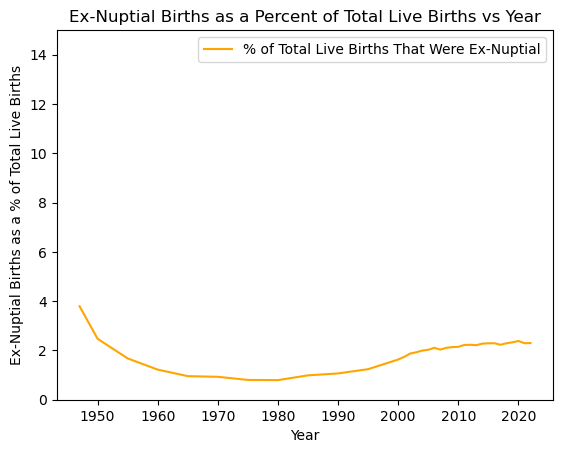

In [11]:
#Plot ex_nuptial births as a percent of total live births by year

#x=selected_columns_copy['year']
#y=selected_columns_copy['ex_nuptial']

fig, ax = plt.subplots()
ax.plot(selected_columns_copy['year'], selected_columns_copy['ex_nuptial %'], color='orange', label="% of Total Live Births That Were Ex-Nuptial")
plt.xlabel("Year")
plt.ylabel('Ex-Nuptial Births as a % of Total Live Births')
plt.ylim(0, 15)
plt.title("Ex-Nuptial Births as a Percent of Total Live Births vs Year")
plt.legend()
plt.show()

### Are there trends in Male vs Female birth rates?

Male birth rate =  0      713442.0
1      727916.0
2      769494.0
3      773296.0
4      763806.0
         ...   
119    470851.0
120    443430.0
121    430713.0
122    415903.0
123    395257.0
Name: birth_male, Length: 124, dtype: float64
Female birth rate =  0      673539.0
1      692618.0
2      732097.0
3      737539.0
4      726010.0
         ...   
119    447549.0
120    421809.0
121    410122.0
122    395719.0
123    375502.0
Name: birth_female, Length: 124, dtype: float64


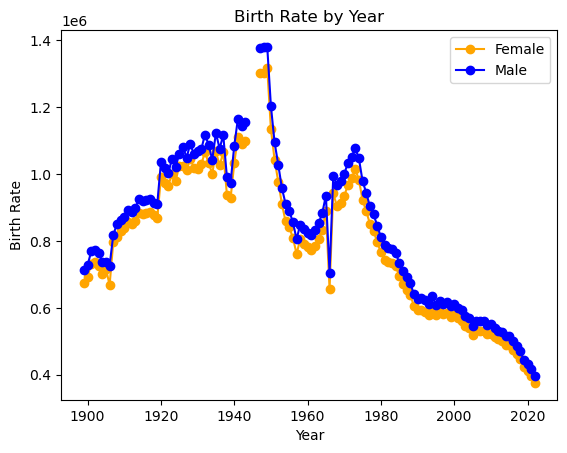

In [25]:
plt.plot(japan_pd['year'], japan_pd['birth_female'], marker='o', color='orange', label="Female")
plt.plot(japan_pd['year'], japan_pd['birth_male'], marker='o', color='blue', label="Male")
print("Male birth rate = ",japan_pd['birth_male'])
print("Female birth rate = ",japan_pd['birth_female'])
plt.xlabel("Year")
plt.ylabel("Birth Rate")
plt.title("Birth Rate by Year")
plt.legend()
plt.show()

In [ ]:
# print(japan_pd)

total male births =  100946748.0
total female births =  95882850.0


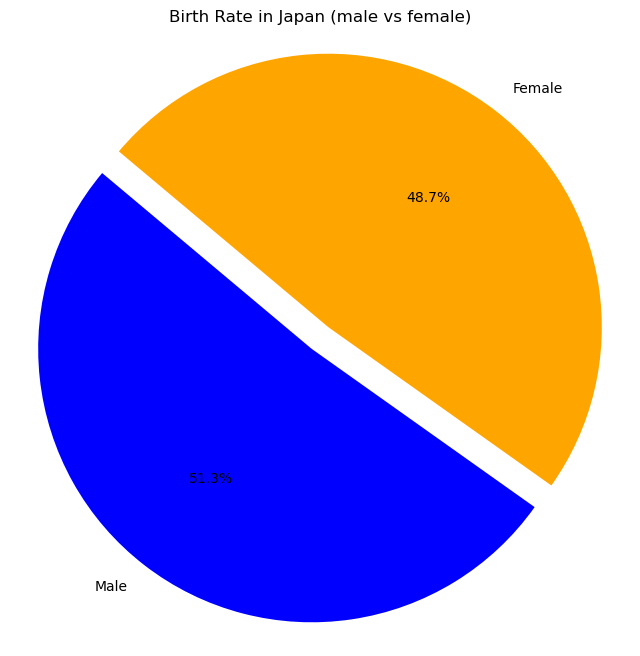

In [22]:
# sum total male & female births
total_male_births = japan_pd['birth_male'].sum()
total_female_births = japan_pd['birth_female'].sum()
print("total male births = ",total_male_births)
print("total female births = ",total_female_births)

# create pie graph
plt.figure(figsize=(8, 8))
labels = ['Male', 'Female']
sizes = [total_male_births, total_female_births]
colors = ['blue', 'orange']
explode=(0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Birth Rate in Japan (male vs female)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

total male births =  81350055.0
total female births =  77143358.0


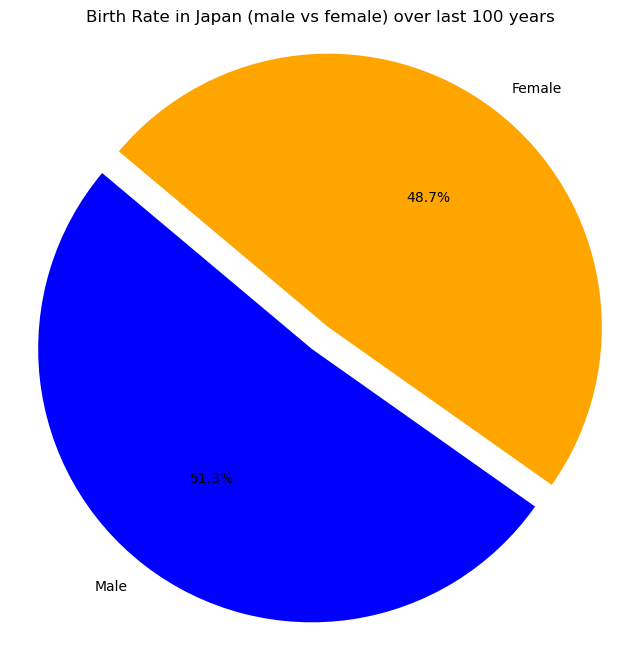

In [23]:
# if limit to last 100 years
last_100yrs = japan_pd[japan_pd['year'] >= japan_pd['year'].max() - 100]
# sum male & female births
total_male_births_last_100yrs = last_100yrs['birth_male'].sum()
total_female_births_last_100yrs = last_100yrs['birth_female'].sum()
print("total male births = ",total_male_births_last_100yrs)
print("total female births = ",total_female_births_last_100yrs)

# create pie graph
plt.figure(figsize=(8, 8))
labels = ['Male', 'Female']
sizes = [total_male_births_last_100yrs, total_female_births_last_100yrs]
colors = ['blue', 'orange']
explode=(0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Birth Rate in Japan (male vs female) over last 100 years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()